In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [137]:
df = pd.read_csv("delivery_time.csv")

In [138]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [139]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [140]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

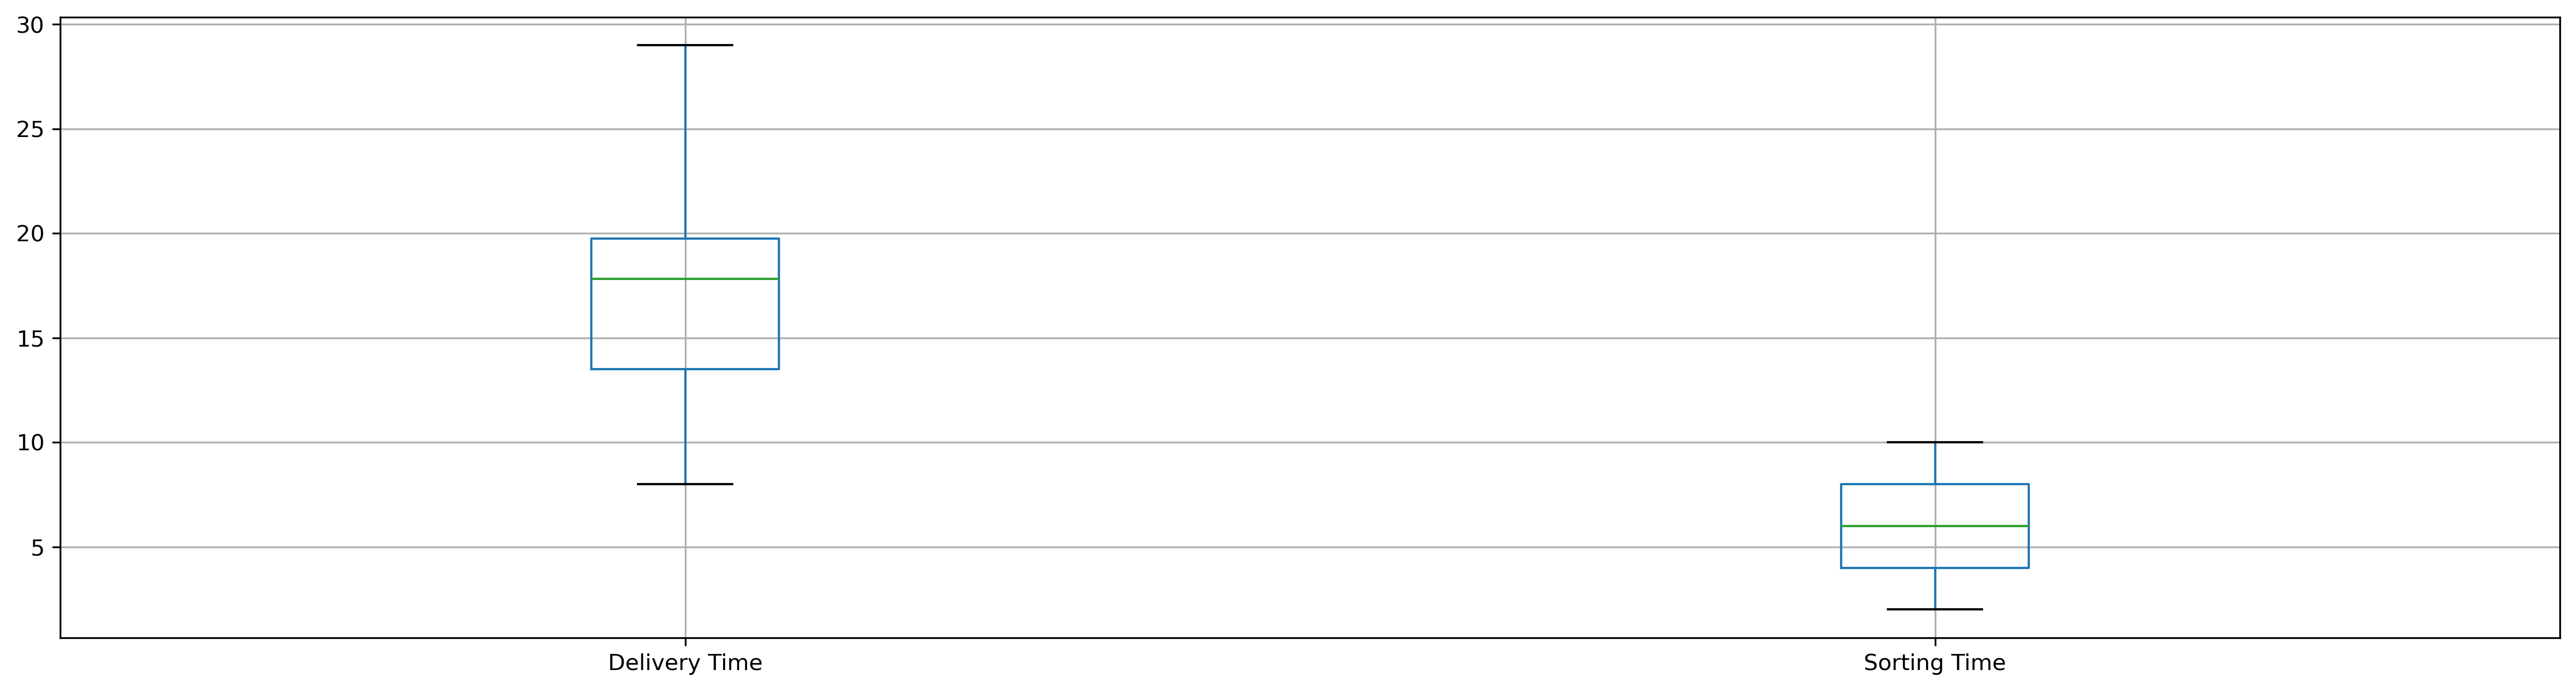

In [141]:
df.boxplot()

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

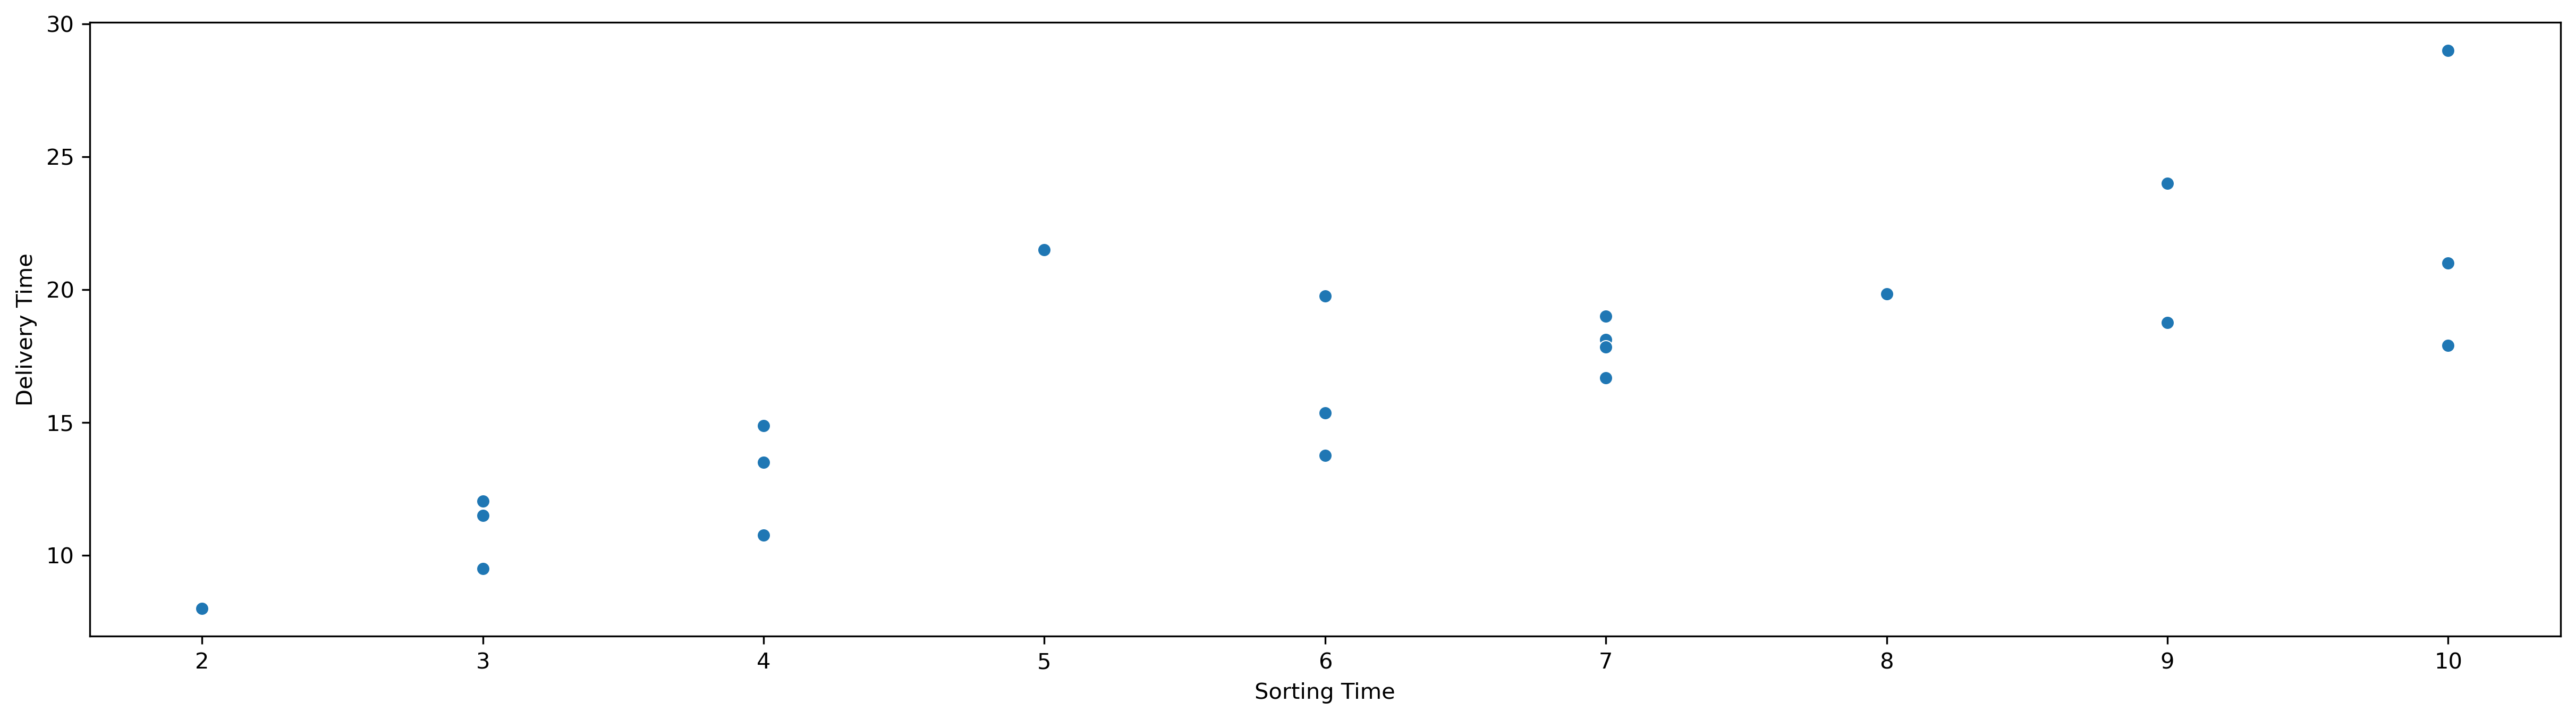

In [142]:
sns.scatterplot(x=df['Sorting Time'], y=df['Delivery Time'])

In [143]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [144]:
X = df[['Sorting Time']]
y = df['Delivery Time']

In [145]:
X

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [146]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [148]:
X = sc.fit_transform(X)

In [149]:
X

array([[ 1.53562462],
       [-0.88298415],
       [-0.07678123],
       [ 1.13252315],
       [ 1.53562462],
       [-0.07678123],
       [ 0.32632023],
       [-1.28608562],
       [ 1.53562462],
       [ 1.13252315],
       [ 0.72942169],
       [-0.88298415],
       [ 0.32632023],
       [-1.28608562],
       [-1.28608562],
       [-0.88298415],
       [-0.07678123],
       [ 0.32632023],
       [-1.68918708],
       [ 0.32632023],
       [-0.47988269]])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
lr = LinearRegression()

In [154]:
lr.fit(X_train,y_train)

LinearRegression()

In [155]:
y_pred = lr.predict(X_test)

In [156]:
y_pred

array([25.02776612, 18.95170915, 12.87565217, 12.87565217, 25.02776612,
       16.92635682])

In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [158]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

12.43809087349132
2.70038230884558
3.5267677657440557


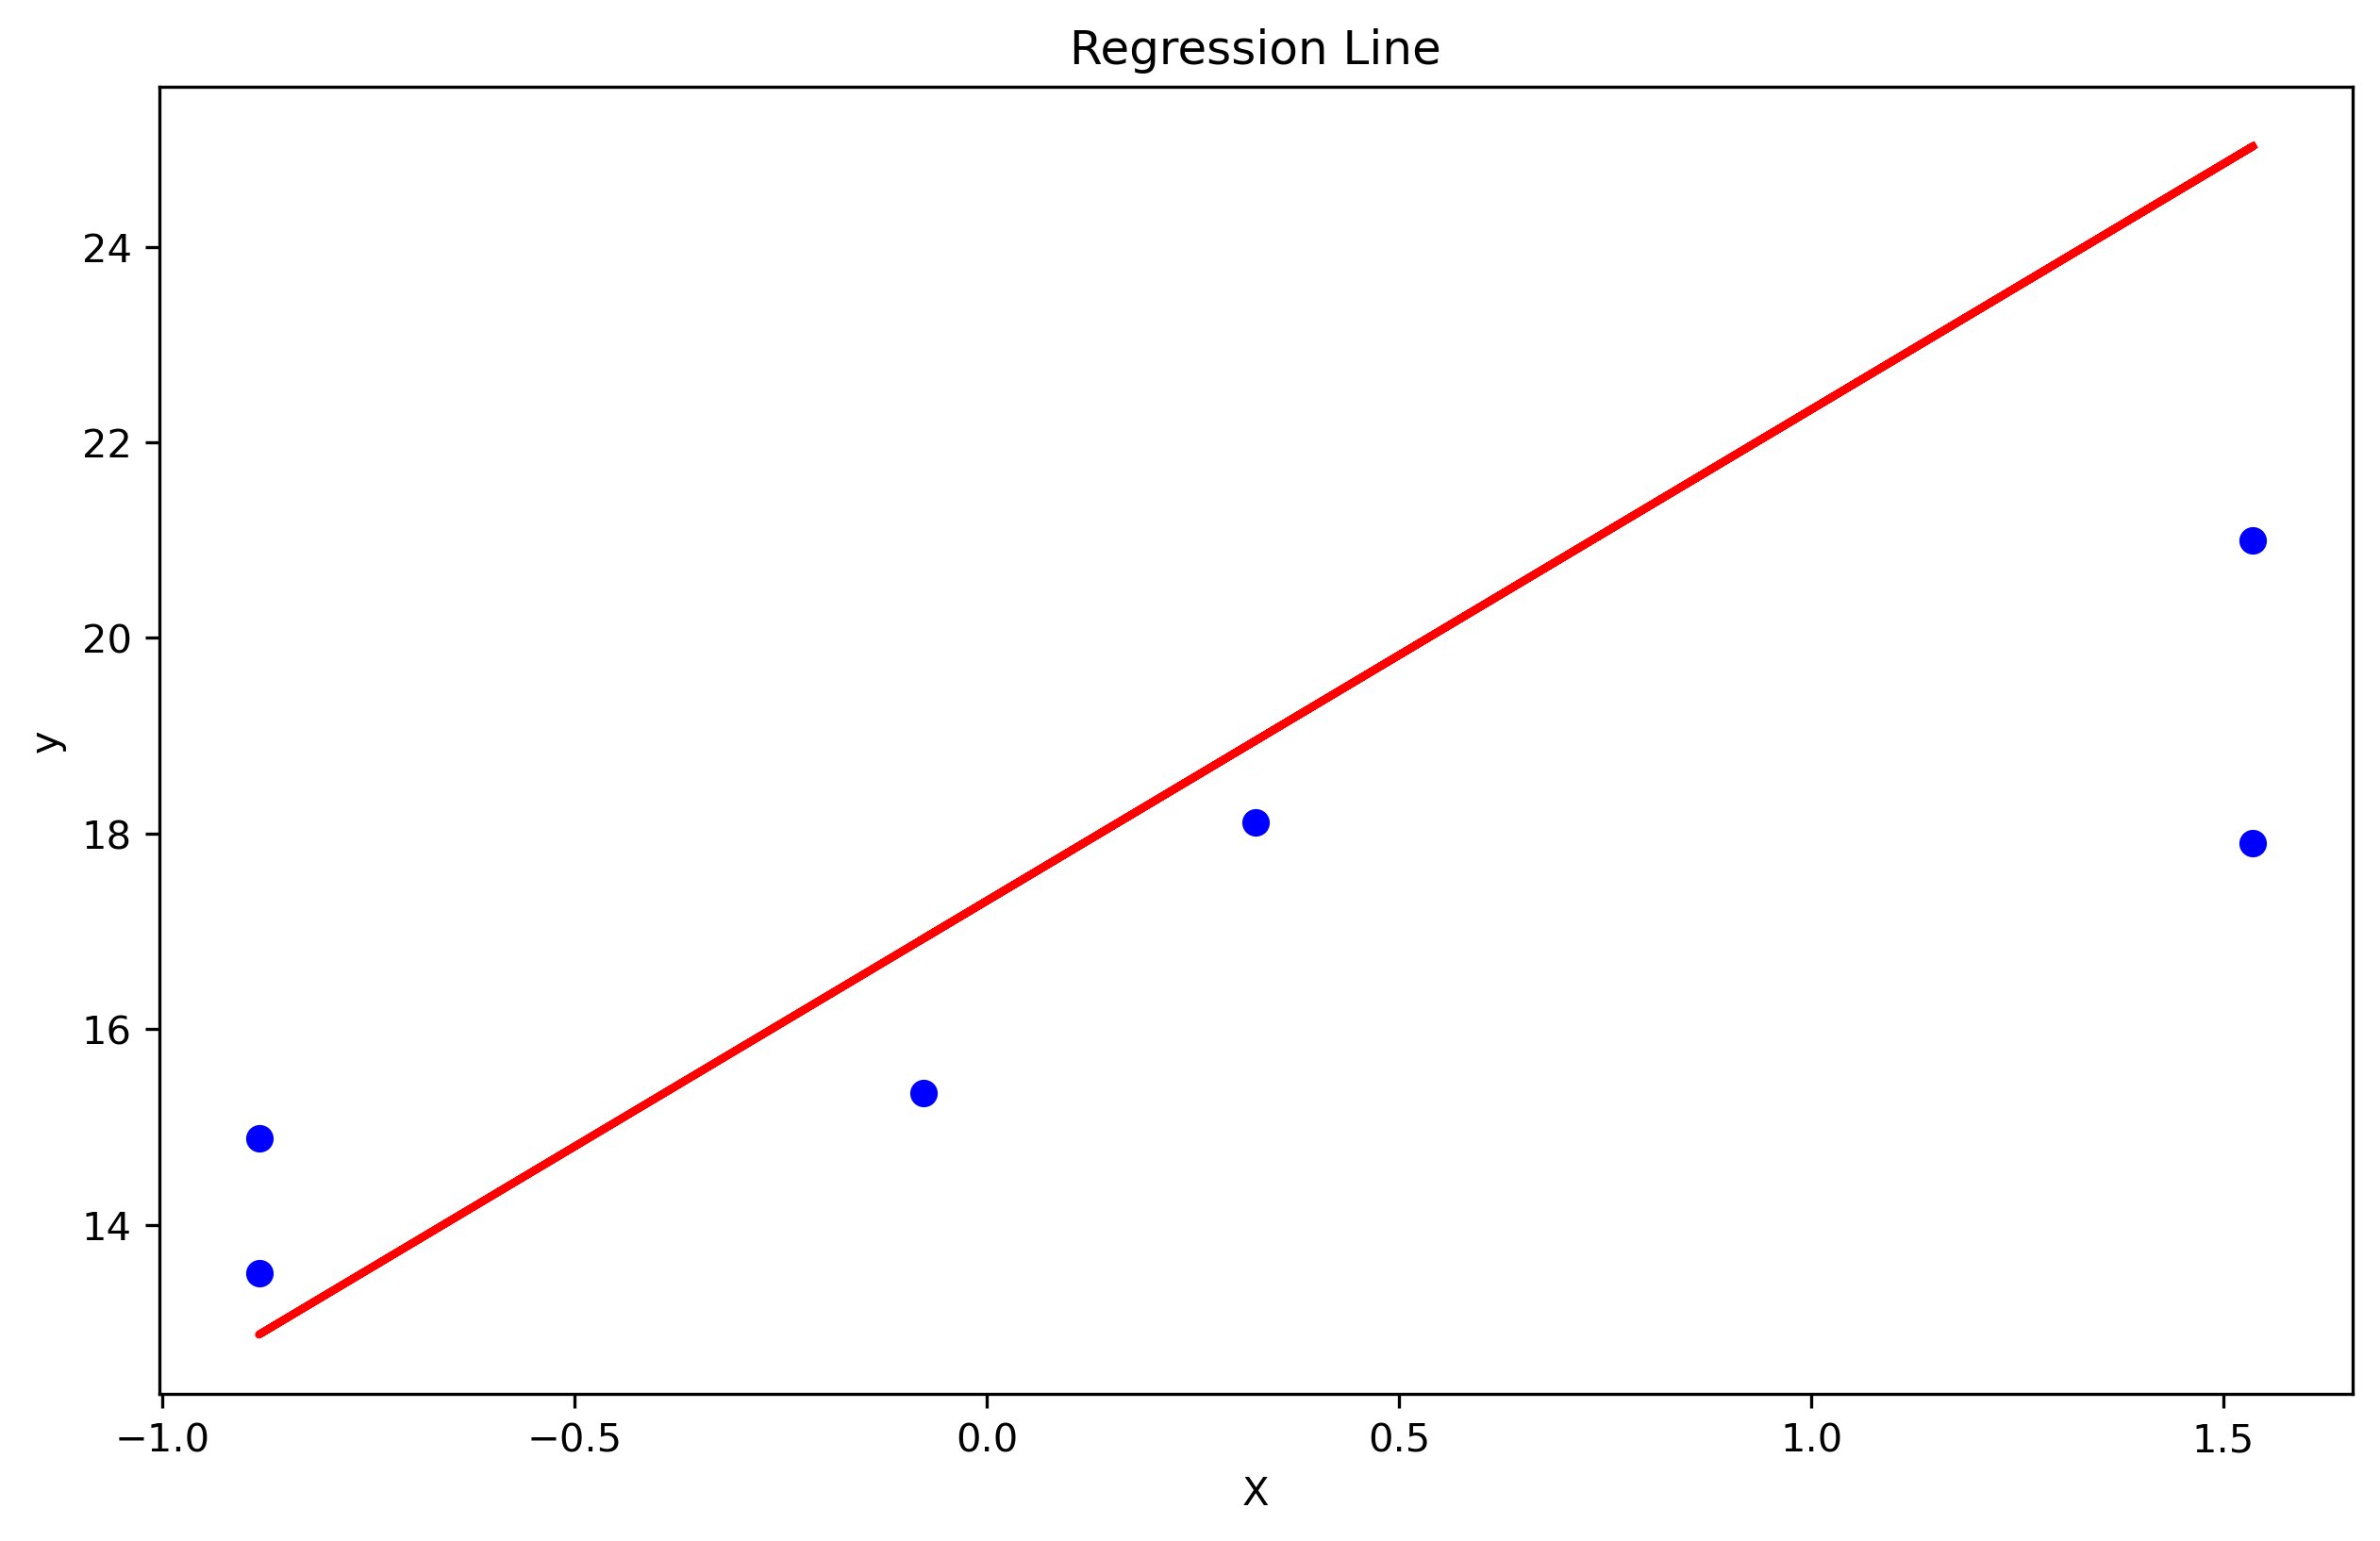

In [159]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [160]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [161]:
print(score)

-1.003752114168786


In [162]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7634418923966004, -1.003752114168786)

In [163]:
X_log = np.log(X)
Y_log = np.log(y)



In [164]:
 X_log_mean = np.nanmean(X_log)
X_log[np.isnan(X_log)] = X_log_mean

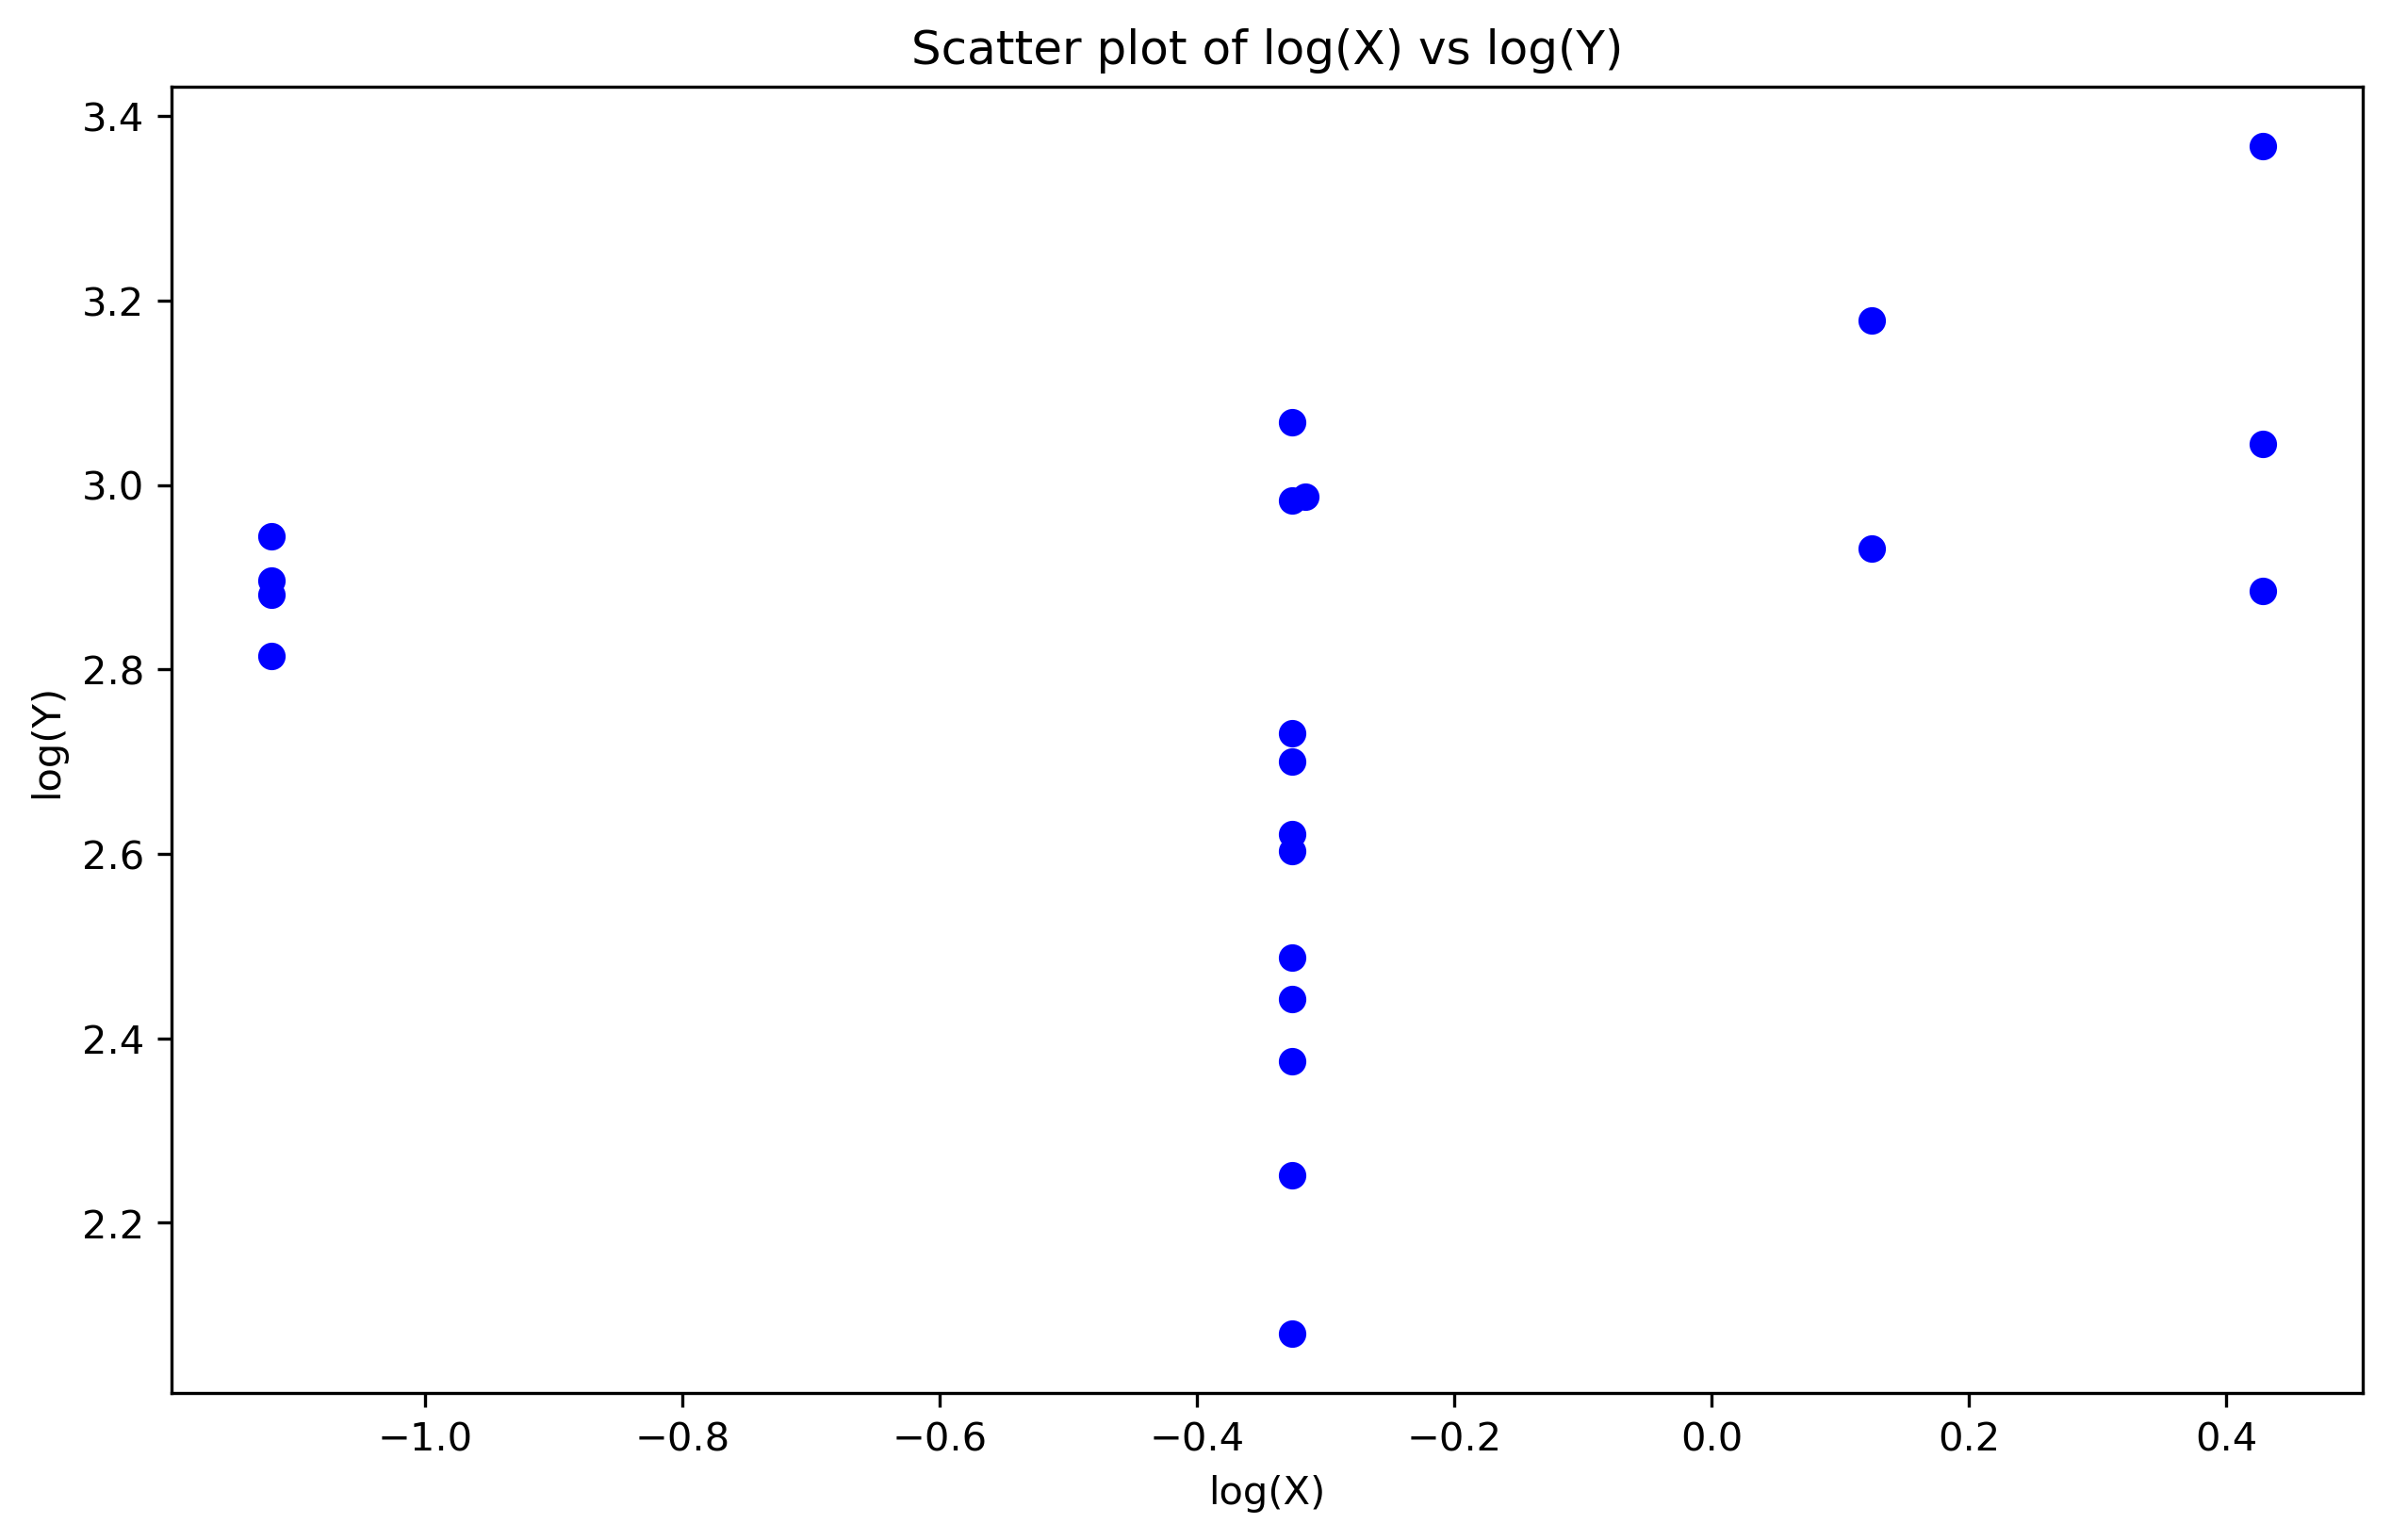

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(X_log, Y_log, color='blue')
plt.title('Scatter plot of log(X) vs log(Y)')
plt.xlabel('log(X)')
plt.ylabel('log(Y)')
plt.show()


In [166]:
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)


In [167]:
model_log = LinearRegression()
model_log.fit(X_log_train, Y_log_train)

LinearRegression()

In [168]:
Y_log_pred = model_log.predict(X_log_test)


In [169]:
mse_log = mean_squared_error(Y_log_test, Y_log_pred)
print("Mean Squared Error (log-transformed):", mse_log)




Mean Squared Error (log-transformed): 0.024297843049004363


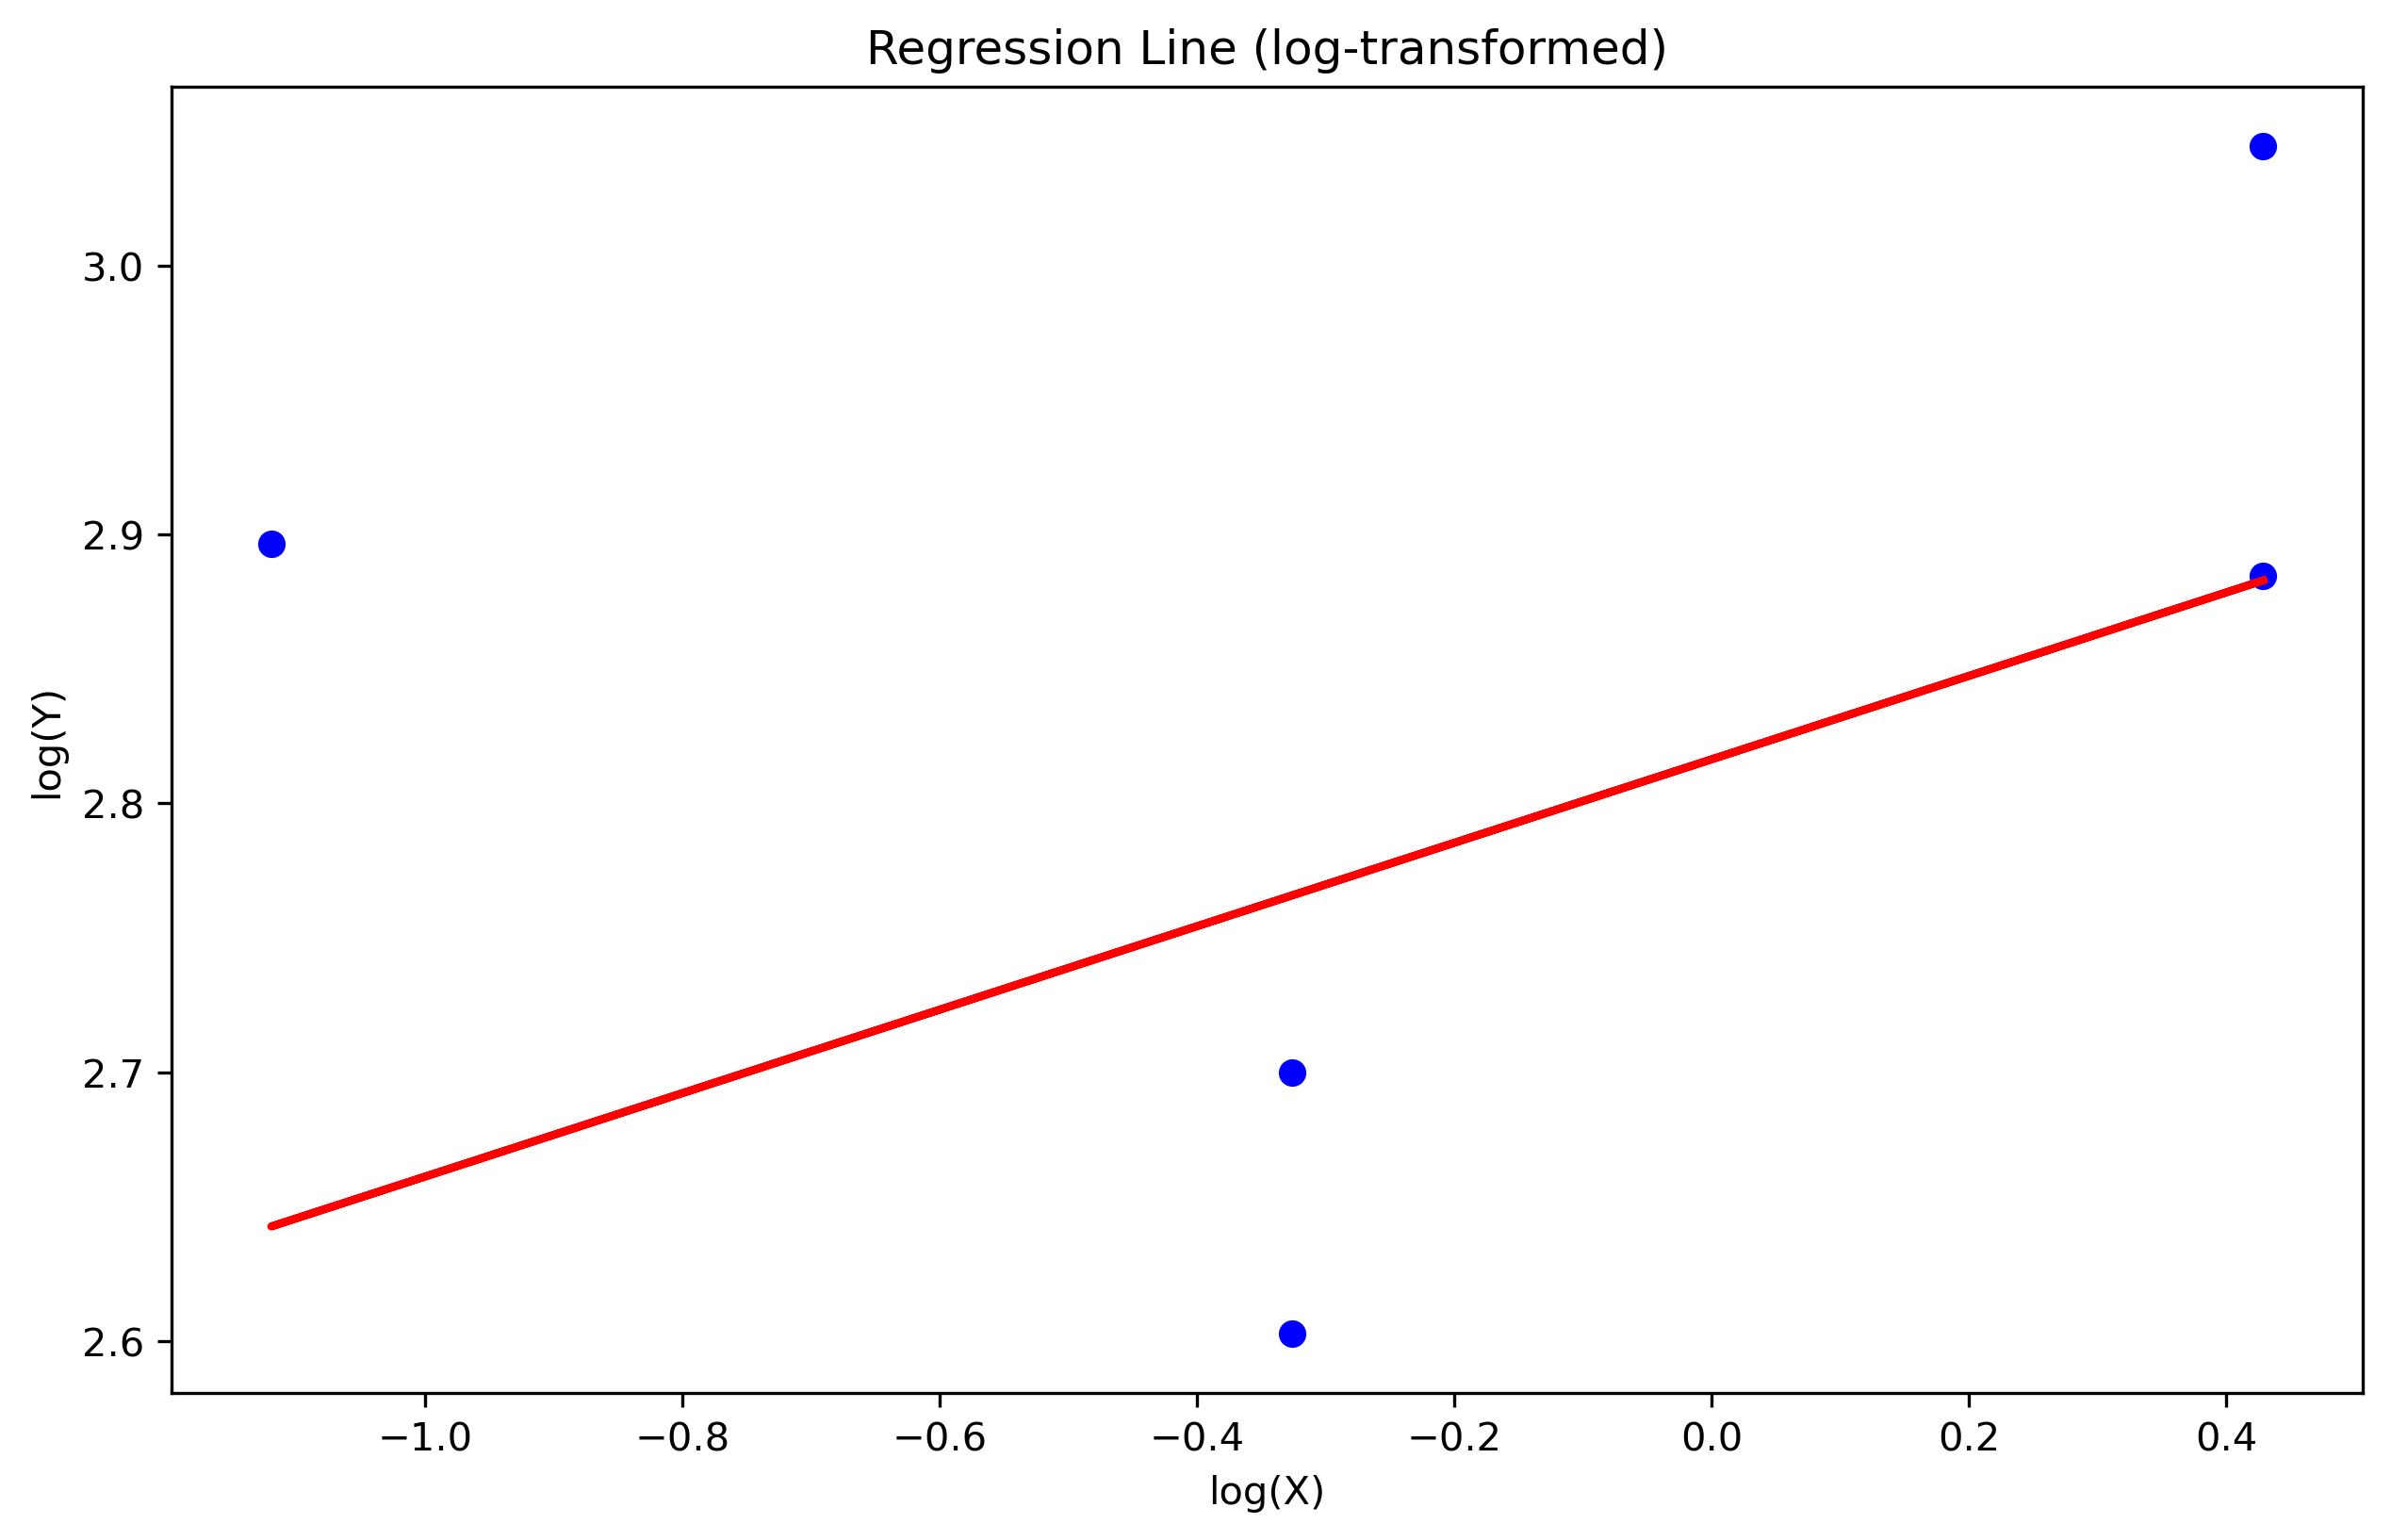

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(X_log_test, Y_log_test, color='blue')
plt.plot(X_log_test, Y_log_pred, color='red', linewidth=2)
plt.title('Regression Line (log-transformed)')
plt.xlabel('log(X)')
plt.ylabel('log(Y)')
plt.show()
